In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install matplotlib==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 6.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install hazm
!pip install stopwords_guilannlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 8.9 MB/s 
     |████████████████████████████████| 1.4 MB 62.1 MB/s 
     |████████████████████████████████| 233 kB 55.7 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394485 sha256=2093439bb9dd3b167af601b6eabbc1b31ae758272ae6ac0c651a3ad25fddfeec
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=155134 sha256=a789e7a3b1a4e990da1150e304e5ab9682b6f4164a20e64e4db8b8feed02df1c
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
Looking in indexes: ht

In [ ]:
!pip install keras.utils import plot_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement import (from versions: none)
ERROR: No matching distribution found for import


In [ ]:
# General
import numpy as np
import pandas as pd
import codecs
from google.colab import files
# Keras
from keras import optimizers
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Embedding, Dropout
from keras.layers import GlobalMaxPool1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import CuDNNLSTM, LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
#from keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Preprocessing
from stopwords_guilannlp import stopwords_output
from hazm import *
# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
#from keras.utils import plot_model
# Measuring metrics
from sklearn.metrics import f1_score

Upload dataset files to colab environment

In [ ]:
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
!unzip /content/drive/MyDrive/DeepSentiPers-master.zip


Archive:  /content/drive/MyDrive/DeepSentiPers-master.zip
7834acb13253ab1a168d07c68c56f41bfe2b8ae4
   creating: DeepSentiPers-master/
  inflating: DeepSentiPers-master/.gitattributes  
   creating: DeepSentiPers-master/Binary-Classification/
  inflating: DeepSentiPers-master/Binary-Classification/DL_FastTextEmb.ipynb  
  inflating: DeepSentiPers-master/Binary-Classification/DL_KerasEmb.ipynb  
  inflating: DeepSentiPers-master/Binary-Classification/ML_Algorithms.ipynb  
   creating: DeepSentiPers-master/Data Augmentation/
  inflating: DeepSentiPers-master/Data Augmentation/DataAugmentation_GT.ipynb  
   creating: DeepSentiPers-master/Dataset/
  inflating: DeepSentiPers-master/Dataset/balanced.csv  
  inflating: DeepSentiPers-master/Dataset/original.csv  
  inflating: DeepSentiPers-master/Dataset/test.csv  
  inflating: DeepSentiPers-master/Dataset/translation.csv  
   creating: DeepSentiPers-master/Images/
   creating: DeepSentiPers-master/Images/Dataset-Distribution/
  inflating: Deep

In [ ]:
%cd /content/DeepSentiPers-master/Dataset
test = pd.read_csv('test.csv', index_col=None, header=None, encoding="utf-8")


/content/DeepSentiPers-master/Dataset


In [ ]:
x_test = test[0]
y_test = test[1]

In [ ]:
print('Number of testing sentence: ', x_test.shape)
print('Number of testing label: ', y_test.shape)

Number of testing sentence:  (1854,)
Number of testing label:  (1854,)


In [ ]:
binary_y_test = []
binary_x_test = []
for i, y in enumerate(y_test):
  if int(y) != 0:
    if int(y) > 0:
      binary_y_test.append(1)
      binary_x_test.append(x_test[i])
    else:
      binary_y_test.append(0)
      binary_x_test.append(x_test[i])

In [ ]:
x_test = np.asarray(binary_x_test)
y_test = np.asarray(binary_y_test)

In [ ]:
original = pd.read_csv('original.csv', index_col=None, header=None, encoding="utf-8")
balanced = pd.read_csv('balanced.csv', index_col=None, header=None, encoding="utf-8")
translation = pd.read_csv('translation.csv', index_col=None, header=None, encoding="utf-8")

In [ ]:
selected_dataset = translation

In [ ]:
selected_dataset = selected_dataset.sample(frac=1).reset_index(drop=True)

In [ ]:
x_train = selected_dataset[0]
y_train = selected_dataset[1]

In [ ]:
print('Number of training sentence: ', x_train.shape)
print('Number of training label: ', y_train.shape)

Number of training sentence:  (14046,)
Number of training label:  (14046,)


In [ ]:
binary_y_train = []
binary_x_train = []
for i, y in enumerate(y_train):
  if int(y) != 0:
    if int(y) > 0:
      binary_y_train.append(1)
      binary_x_train.append(x_train[i])
    else:
      binary_y_train.append(0)
      binary_x_train.append(x_train[i])

In [ ]:
# Convert dataframes to numpy arrays
x_train = np.asarray(binary_x_train)
y_train = np.asarray(binary_y_train)

In [ ]:
# See the data number of sentence in each category 
from collections import Counter
cnt = Counter(y_train)
cnt = dict(cnt)
print(cnt)

{1: 7856, 0: 2190}


# Preprocess

In [ ]:
puncs = ['،', '.', ',', ':', ';', '"']
normalizer = Normalizer()
lemmatizer = Lemmatizer()

# turn a doc into clean tokens
def clean_doc(doc):
    doc = normalizer.normalize(doc) # Normalize document using Hazm Normalizer
    tokenized = word_tokenize(doc)  # Tokenize text
    tokens = []
    for t in tokenized:
      temp = t
      for p in puncs:
        temp = temp.replace(p, '')
      tokens.append(temp)
    # tokens = [w for w in tokens if not w in stop_set]    # Remove stop words
    tokens = [w for w in tokens if not len(w) <= 1]
    tokens = [w for w in tokens if not w.isdigit()]
    tokens = [lemmatizer.lemmatize(w) for w in tokens] # Lemmatize sentence words using Hazm Lemmatizer
    tokens = ' '.join(tokens)
    return tokens

# Prepare data for Deep Learning model

## Apply preprocessing to data

In [ ]:
# Apply preprocessing step to training data
train_docs = np.empty_like(x_train)
for index, document in enumerate(x_train):
  train_docs[index] = clean_doc(document)

NameError: ignored

In [ ]:
# Applying preprocessing step to test data
test_docs = np.empty_like(x_test)
for index, document in enumerate(x_test):
  test_docs[index] = clean_doc(document)

## Setting tokenizer up

In [ ]:
num_words = 2500

# Create the tokenizer
tokenizer = Tokenizer()

# fFt the tokenizer on the training documents
tokenizer.fit_on_texts(train_docs)

In [ ]:
# Find maximum length of training sentences
max_length = max([len(s.split()) for s in train_docs])

## Embed sentences

In [ ]:
# Embed training sequences
encoded_docs = tokenizer.texts_to_sequences(train_docs)

# Pad embeded training sequences
x_train_padded = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [ ]:
# Define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index)

In [ ]:
# Embed testing sequences
encoded_docs = tokenizer.texts_to_sequences(test_docs)
# Pad testing sequences
x_test_padded = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

## B-LSTM Model

In [ ]:
model_blstm = Sequential()
model_blstm.add(Embedding(vocab_size, 300, input_length=max_length))
model_blstm.add(Bidirectional(CuDNNLSTM(300, return_sequences=True, name='lstm_layer')))
model_blstm.add(GlobalMaxPool1D())
model_blstm.add(Dropout(0.2))
model_blstm.add(Dense(300, activation="relu"))
model_blstm.add(Dropout(0.1))
model_blstm.add(Dense(1, activation='sigmoid'))

In [ ]:
model_blstm.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_blstm.summary()
batch_size_blstm = 32
epochs_blstm = 5

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 257, 300)          2021400   
                                                                 
 bidirectional (Bidirectiona  (None, 257, 600)         1444800   
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 600)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 dense (Dense)               (None, 300)               180300    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0

In [ ]:
# Train model
hist_blstm = model_blstm.fit(x_train_padded, y_train, batch_size=batch_size_blstm, epochs=epochs_blstm)

Epoch 1/5
314/314 [==============================] - 21s 43ms/step - loss: 0.3794 - accuracy: 0.8298
Epoch 2/5
314/314 [==============================] - 13s 42ms/step - loss: 0.2153 - accuracy: 0.9151
Epoch 3/5
314/314 [==============================] - 13s 43ms/step - loss: 0.1245 - accuracy: 0.9523
Epoch 4/5
314/314 [==============================] - 14s 43ms/step - loss: 0.0800 - accuracy: 0.9715
Epoch 5/5
314/314 [==============================] - 14s 45ms/step - loss: 0.0569 - accuracy: 0.9805


In [ ]:
# Evaluate model
loss_blstm, acc_blstm = model_blstm.evaluate(x_test_padded, y_test, verbose=0)
print('Test Accuracy: %f' % (acc_blstm*100))

Test Accuracy: 80.738074


In [ ]:
# Get prediction label
y_pred_blstm = model_blstm.predict_classes(x_test_padded)

AttributeError: ignored

## CNN Model

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size, 300, input_length=max_length))
model_cnn.add(Conv1D(filters=64, kernel_size=4, activation='relu', padding='same'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=64, kernel_size=8, activation='relu', padding='same'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=64, kernel_size=16, activation='relu', padding='same'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dropout(0.1))
model_cnn.add(Dense(500, activation="sigmoid"))
model_cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
model_cnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_cnn.summary()
batch_size_cnn = 64
epochs_cnn = 10

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 257, 300)          2021400   
                                                                 
 conv1d (Conv1D)             (None, 257, 64)           76864     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 128, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 128, 64)           32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 64, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 64, 64)           

In [ ]:
# Train model
hist_cnn = model_cnn.fit(x_train_padded, y_train, batch_size=batch_size_cnn, epochs=epochs_cnn)

Epoch 1/10
157/157 [==============================] - 10s 17ms/step - loss: 0.4462 - accuracy: 0.8013
Epoch 2/10
157/157 [==============================] - 2s 11ms/step - loss: 0.2391 - accuracy: 0.9043
Epoch 3/10
157/157 [==============================] - 2s 11ms/step - loss: 0.1270 - accuracy: 0.9535
Epoch 4/10
157/157 [==============================] - 2s 11ms/step - loss: 0.0683 - accuracy: 0.9772
Epoch 5/10
157/157 [==============================] - 2s 11ms/step - loss: 0.0346 - accuracy: 0.9898
Epoch 6/10
157/157 [==============================] - 2s 11ms/step - loss: 0.0239 - accuracy: 0.9931
Epoch 7/10
157/157 [==============================] - 2s 11ms/step - loss: 0.0222 - accuracy: 0.9934
Epoch 8/10
157/157 [==============================] - 2s 11ms/step - loss: 0.0165 - accuracy: 0.9955
Epoch 9/10
157/157 [==============================] - 2s 11ms/step - loss: 0.0125 - accuracy: 0.9972
Epoch 10/10
157/157 [==============================] - 2s 11ms/step - loss: 0.0110 - accur

In [ ]:
# Evaluate model
loss_cnn, acc_cnn = model_cnn.evaluate(x_test_padded, y_test, verbose=0)
print('Test Accuracy: %f' % (acc_cnn*100))

Test Accuracy: 81.008101


In [ ]:
# Get prediction label
y_pred_cnn = model_cnn.predict_classes(x_test_padded)

AttributeError: ignored

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    print(im)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

class_names = np.array([0, 1])
np.set_printoptions(precision=2)

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_blstm, classes=class_names)
# plt.savefig('cm-blstm.png')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_blstm, classes=class_names, normalize=True)
# Decomment following line if you want to save the figure
# plt.savefig('cm-blstm-normalized.png')
plt.show()

NameError: ignored

Confusion matrix, without normalization
[[153  43]
 [ 62 853]]
AxesImage(54,36;334.8x217.44)
Normalized confusion matrix
[[0.78 0.22]
 [0.07 0.93]]
AxesImage(54,36;334.8x217.44)


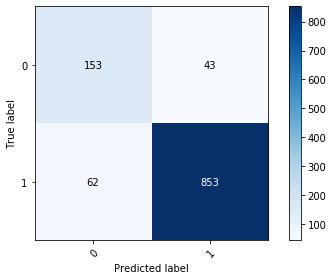

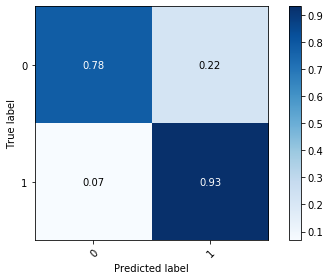

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_cnn, classes=class_names)
# plt.savefig('cm-cnn.png')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_cnn, classes=class_names, normalize=True)
# plt.savefig('cm-cnn-normalized.png')
plt.show()

## F1 Score

In [ ]:
print("(Weighted) F1 score of KerasEmb B-LSTM model:")
f1_score(y_test, y_pred_blstm, average='weighted')

(Weighted) F1 score of KerasEmb B-LSTM model:


0.918494668729293

In [ ]:
print("(Weighted) F1 score of KerasEmb CNN model:")
f1_score(y_test, y_pred_cnn, average='weighted')

(Weighted) F1 score of KerasEmb CNN model:


0.9071793039033779